    Year   Time
0   1896  12.00
1   1900  11.00
2   1904  11.00
3   1906  11.20
4   1908  10.80
5   1912  10.80
6   1920  10.80
7   1924  10.60
8   1928  10.80
9   1932  10.30
10  1936  10.30
11  1948  10.30
12  1952  10.40
13  1956  10.50
14  1960  10.20
15  1964  10.00
16  1968   9.95
17  1972  10.14
18  1976  10.06
19  1980  10.25
20  1984   9.99
21  1988   9.92
22  1992   9.96
23  1996   9.84
24  2000   9.87
25  2004   9.85
26  2008   9.69
Initiating bombardment
        Year   Time
0  -1.580157  12.00
1  -1.468031  11.00
2  -1.355904  11.00
3  -1.299840  11.20
4  -1.243777  10.80
5  -1.131650  10.80
6  -0.907397  10.80
7  -0.795270  10.60
8  -0.683143  10.80
9  -0.571016  10.30
10 -0.458889  10.30
11 -0.122509  10.30
12 -0.010382  10.40
13  0.101745  10.50
14  0.213872  10.20
15  0.325998  10.00
16  0.438125   9.95
17  0.550252  10.14
18  0.662379  10.06
19  0.774506  10.25
20  0.886632   9.99
21  0.998759   9.92
22  1.110886   9.96
23  1.223013   9.84
24  1.335140   9.87
25  1.447

/opt/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


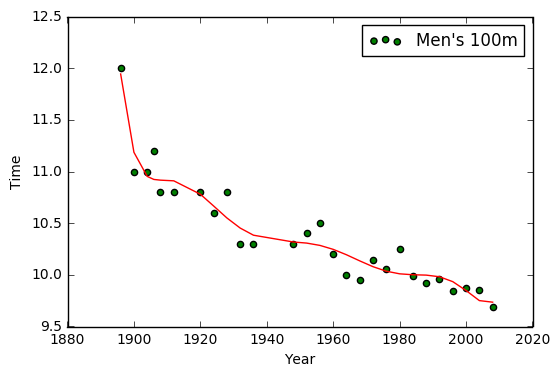

In [30]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation as cv

def linreg(data, degree):
    global toMatrix
    check = toMatrix.as_matrix()
   

    matrixt = toMatrix.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    toMatrix = toMatrix.drop('Time', 1)
    toMatrix.insert(0, 'Const', 1)
    #print (toMatrix)
    
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            toMatrix['Order' + str(count)] = toMatrix['Year']**count
    #print (toMatrix)
    matrixX = toMatrix.as_matrix()
    matrixXt = matrixX.transpose()
    invert = np.linalg.inv(np.matmul(matrixXt, matrixX))
    term2 = np.matmul(matrixXt, matrixt)
    return np.matmul(invert, term2)
  
def linreg2(data, degree):
    
    matrixt = data.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    data = data.drop('Time', 1)
    data.insert(0, 'Const', 1)
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            data['Order' + str(count)] = data['Year']**count
    #print (data)
    matrixX = data.as_matrix()
    matrixXt = matrixX.transpose()
    invert = np.linalg.inv(np.matmul(matrixXt, matrixX))
    term2 = np.matmul(matrixXt, matrixt)
    return np.matmul(invert, term2)

def predict(w, year, degree, norm):
    if norm==0:
        meanminus = year - yearmean
        year = meanminus/yearstd
    
    y = w[1,0]*year+w[0,0]
    count = 1   
    while count < degree:
        count = count + 1
        y = y + year**count * w[count,0]
    print (y)
    return y
    

def scaleData(data, row, option):
    #print(yearmean)
    
    if (option == 1):
        for index,rows in data.iterrows():            
             
            meanminus = rows[row] - yearmean
            newframe = meanminus/yearstd
            data[row].iloc[index] = newframe 
            
    return data
            



male100 = pd.read_csv('male100.csv', header = 0)
female100 = pd.read_csv('female100.csv',header=0)

#male100.to_csv('demo.csv')

#male100.plot(x=0,y=1, kind ='scatter', color='g', marker='v'', label="Men’s 100m")

print (male100)
copymale100 = male100.copy()
#print(copymale100)
timemean = copymale100['Time'].mean()
timestd = copymale100['Time'].std()

yearmean = copymale100['Year'].mean()
yearstd = copymale100['Year'].std()

#To get some basic statistics, we can use the describe() method:
#print copymale100['Time'].describe(), "\n"
#print (yearmean, yearstd)




copymale100 = scaleData(copymale100, 'Year', 1)
#print(copymale100)

toMatrix = copymale100.copy()
degree = 8
w = linreg(copymale100, degree)
#print (w)
ax = male100.plot(x=0,y=1, kind ='scatter', color='g', label="Men's 100m")
#female100.plot(x=0,y=1, kind ='scatter', color='r', label="Women's 100m", ax = ax)
#print (toMatrix)
y = w[1,0]*copymale100['Year']+w[0,0]
count = 1
while count < degree:
    count = count + 1
    y = y + toMatrix['Order' + str(count)] * w[count,0]
plt.plot(male100['Year'],y,'r-',color = 'r')

#print (predict(w, 2020, degree, 0))
print ("Initiating bombardment")
print (copymale100)
kf = cv.KFold(27, n_folds=3)
rmseList = []
deg = 3
count = 0
while count < deg:
    count = count + 1
    totalLoss = 0
    nObs = 0
    for train_index, test_index in kf:
        toCheck = copymale100.copy()
        #print (toCheck) 
        print (test_index)
        toCheck = toCheck.drop(toCheck.index[test_index]) 
        wW = linreg2(toCheck, count)
        print (wW)
        for x in np.nditer(test_index):
            nObs = nObs + 1
            #print (x)
            #print (copymale100)
            testT = copymale100.ix[int(x), 1]
            testYear = copymale100.ix[int(x), 0]
            print (testT, testYear)

            testPredict = predict(wW, testYear, count, 1)
            totalLoss = totalLoss + (testT - testPredict) * (testT - testPredict)
    print (nObs)
    rmse = (totalLoss/nObs)
    rmseList.append(rmse)
print("_______________________________")
print (rmseList)
        #print (predict(wW, -1.580157, 2, 1))